### Clustering on Eastwestairlines_data

### Heirarchical clustering

In [1]:
#import libraries
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
EWAirlines = pd.read_csv("EastWestAirlines_data")
EWAirlines

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [3]:
EWAirlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
#Normalizing function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
#Normalized dataframe considering only numerical part
df_norm = norm_func(EWAirlines.iloc[:,1:])

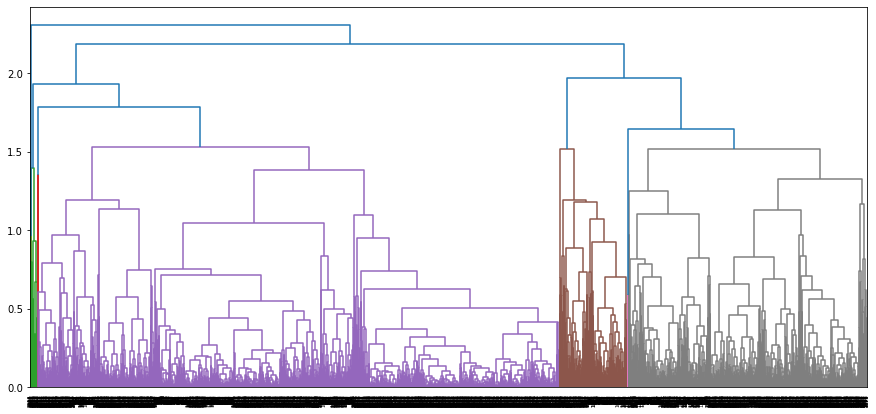

In [6]:
#create dendrogram
plt.figure(figsize=(15,7))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method ='complete'))

In [7]:
#Create clusters
hclusters = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [8]:
y = pd.DataFrame(hclusters.fit_predict(df_norm),columns=['clusterid'])
y['clusterid'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: clusterid, dtype: int64

In [9]:
#Adding clusters to dataset
EWAirlines['hclusterid']= hclusters.labels_

In [10]:
EWAirlines

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  hclusterid  
0          0           1  
1          0           1  
2          0           1  
3          0           1  
4          1           3  
...      ...         ...  
3994       1           0  
3995       1           0  
3996       1           0  
3997       0           4  
3998       0           4  

[3999 rows x 13 columns]

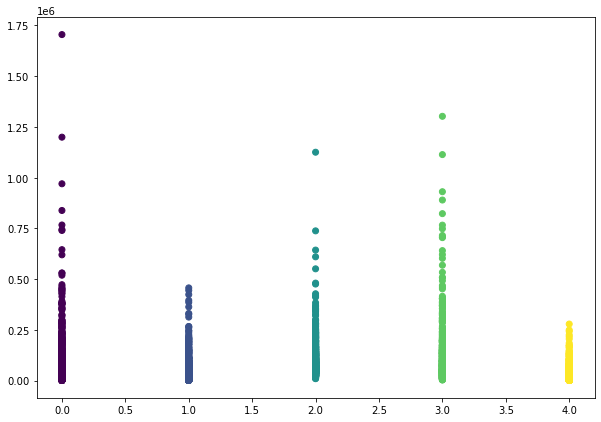

In [11]:
#Plot clusters
plt.figure(figsize=(10,7))
plt.scatter(EWAirlines['hclusterid'],EWAirlines['Balance'], c=hclusters.labels_)

### K-Means clustering

In [12]:
from sklearn.cluster import KMeans

In [13]:
#Normalization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
EWAirlines_df =scaler.fit_transform(EWAirlines.iloc[:,1:])

In [15]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

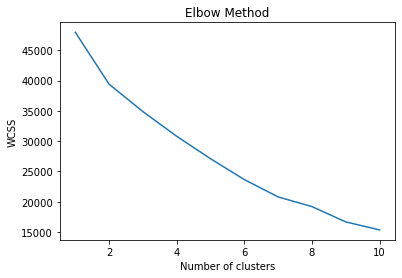

In [16]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(EWAirlines_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
#Build cluster algorithm
clusters_new = KMeans(6, random_state =  22000)
clusters_new.fit(EWAirlines_df)

KMeans(n_clusters=6, random_state=22000)

In [18]:
clusters_new.labels_

array([1, 1, 1, ..., 3, 1, 1])

In [19]:
#Assign clusters to the dataset
EWAirlines['kclusterid'] = clusters_new.labels_

In [20]:
#standardized values
clusters_new.cluster_centers_

array([[ 5.91547578e-01, -4.32531787e-02,  1.55132279e+00,
        -9.82418871e-02, -5.07135881e-02,  1.33182061e+00,
         8.39647329e-01, -6.58634377e-02, -6.46922314e-02,
         4.14281198e-01,  4.17112471e-01,  5.59615572e-01],
       [-2.95082584e-01, -7.23033588e-02, -5.38655952e-01,
        -9.82418871e-02, -6.03249585e-02, -5.08949160e-01,
        -4.56401361e-01, -2.12749481e-01, -2.34608524e-01,
        -2.31239392e-01, -7.66919299e-01,  3.00602713e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01,  5.52357009e-01],
       [-6.47036868e-02,  9.22794085e-02, -2.31978448e-01,
        -9.82418871e-02, -6.27665798e-02, -2.40653308e-01,
        -5.27744949e-02, -2.00003984e-02, -1.40817386e-02,
         1.05903326e-01,  1.30151580e+00, -1.25029089e+00],
       [-4.68896637e-02, -1.56235600e-01, -6.6822727

In [21]:
EWAirlines

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  hclusterid  kclusterid  
0          0           1           1  
1          0           1           1  
2          0           1           1  
3          0           1           1  
4          1           3           0  
...      ...         ...         ...  
3994       1           0           3  
3995       1           0           3  
3996       1           0           3  
3997       0           4           1  
3998       0           4           1  

[3999 rows x 14 columns]

In [22]:
EWAirlines.groupby('kclusterid').agg(['mean']).reset_index()

kclusterid          ID#        Balance  Qual_miles cc1_miles cc2_miles  \
                     mean           mean        mean      mean      mean   
0          0  1546.823529  133207.474118  110.655294  4.195294  1.000000   
1          1  2267.528599   43867.902288   88.183031  1.317922  1.000000   
2          2  1664.866667  138061.400000   78.800000  3.466667  1.000000   
3          3  1904.645012   67081.585847  215.498840  1.740139  1.000000   
4          4  2269.372093   68876.581395   23.255814  1.139535  2.348837   
5          5  1685.709924  200103.480916  834.404580  2.320611  1.000000   

  cc3_miles   Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
       mean          mean        mean              mean            mean   
0  1.002353  49305.581176   19.664706        367.844706        1.128235   
1  1.000477   4854.768351    7.219256        162.199237        0.483794   
2  4.066667  93927.866667   28.066667        506.666667        1.600000   
3  1.000000  11333.562645   11.095128        432.054524        1.320186   
4  1.000000  14689.837209   17.534884        582.627907        2.209302   
5  1.000000  35550.229008   28.977099       5967.305344       17.267176   

  Days_since_enroll    Award? hclusterid  
               mean      mean       mean  
0       4973.998824  0.571765   2.543529  
1       3641.078646  0.000000   2.179695  
2       4613.866667  0.533333   2.533333  
3       4337.236659  0.998840   0.001160  
4       3968.930233  0.395349   0.627907  
5       4768.450382  0.832061   1.732824

### DBSCAN Clustering

In [23]:
from sklearn.cluster import DBSCAN

In [24]:
EWAirlines.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
4           26               2077                4               6935       1   

   hclusterid  kclusterid  
0           1           1  
1           1           1  
2           1           1  
3           1           1  
4           3           0

In [25]:
EWAirlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
 12  hclusterid         3999 non-null   int64
 13  kclusterid         3999 non-null   int32
dtypes: int32(1), int64(13)
memory usage: 421.9 KB


In [26]:
EWAirlines.drop(['ID#'],axis=1,inplace=True)

In [27]:
array = EWAirlines.values

In [28]:
array

array([[28143,     0,     1, ...,     0,     1,     1],
       [19244,     0,     1, ...,     0,     1,     1],
       [41354,     0,     1, ...,     0,     1,     1],
       ...,
       [73597,     0,     3, ...,     1,     0,     3],
       [54899,     0,     1, ...,     0,     4,     1],
       [ 3016,     0,     1, ...,     0,     4,     1]], dtype=int64)

In [29]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(array)

In [30]:
X = stscaler.transform(array)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -5.39219215e-01, -3.09644547e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -5.39219215e-01, -3.09644547e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -5.39219215e-01, -3.09644547e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
         1.30391816e+00, -1.25111675e+00,  1.29641063e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  1.59647340e+00, -3.09644547e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  1.59647340e+00, -3.09644547e-01]])

In [31]:
dbscan =DBSCAN(eps=2, min_samples=12)
dbscan.fit(X)

DBSCAN(eps=2, min_samples=12)

In [32]:
#Noisy samples are given label -1
dbscan.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [34]:
c1 = pd.DataFrame(dbscan.labels_,columns=['cluster'])
c1

cluster
0           0
1           0
2           0
3           0
4           1
...       ...
3994        2
3995        2
3996        2
3997        0
3998        0

[3999 rows x 1 columns]

In [37]:
EWAirlines['dbclusterid'] = dbscan.labels_
EWAirlines

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  hclusterid  kclusterid  dbclusterid  
0          0           1           1            0  
1          0           1           1            0  
2          0           1           1            0  
3          0           1           1            0  
4          1           3           0            1  
...      ...         ...         ...          ...  
3994       1           0           3            2  
3995       1           0           3            2  
3996       1           0           3            2  
3997       0           4           1            0  
3998       0           4           1            0  

[3999 rows x 14 columns]